# SWMAL Exercise


##  Artificial Neural Networks as Universal Approximators

In this task, we will explore the approximating capabilities of a basic Artificial Neural Network (ANN) featuring a solitary hidden layer comprising two neurons. The activation function employed in these neurons is the hyperbolic tangent (tanh), while the input and output layers utilize the identity activation function. When a neuron employs the tanh activation function, it can alter its direction once. By employing two neurons together, they can effectively approximate a non-monotonic function that exhibits an ascent followed by a descent, a pattern characterizing a simple function with a single peak.

The exercise provides the data generation function, and a plot illustrating the generated data is presented below.

OK


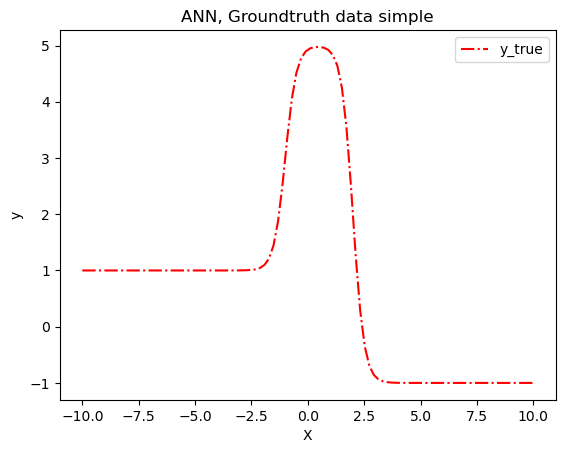

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
plt.plot(X, y_true, "r-.")
plt.legend(["y_true"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")
           
print("OK")

#### Qa) Fitting the model using the data generator

We employ the MLPRegressor for model fitting. The activation function is configured as tanh, and the hidden layers parameter is set to [2], signifying a single layer with two neurons.

In [4]:
# Create MLP and fit model, just run..
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [2], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)

mlp.fit(X, y_true)
y_pred = mlp.predict(X)

print("OK")

OK


Weights and bias:
Weight 1:  [[ 2.00013827 -2.00014681]]
Bias 1:    [-4.00022495 -2.00017648]
Weight 2:  [[-3.00009045]
 [-2.00009492]]
Bias 2:    [-4.88812571e-05]
OK


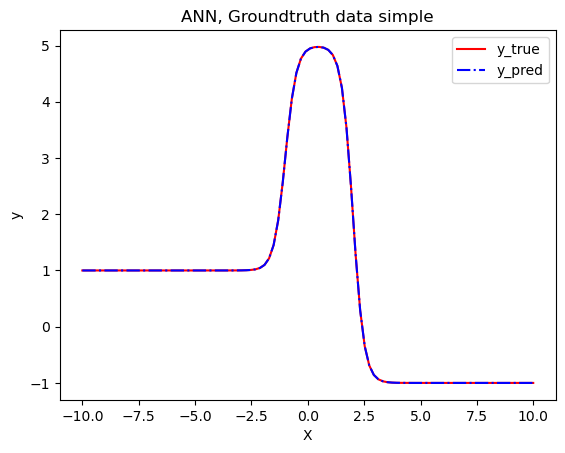

In [5]:
plt.plot(X, y_true, "r-")
plt.plot(X, y_pred, "b-.")
plt.legend(["y_true", "y_pred"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")


print("Weights and bias:")
print("Weight 1: " , mlp.coefs_[0])
print("Bias 1:   " , mlp.intercepts_[0])
print("Weight 2: " , mlp.coefs_[1])
print("Bias 2:   " , mlp.intercepts_[1])

print("OK")

#### Qb)
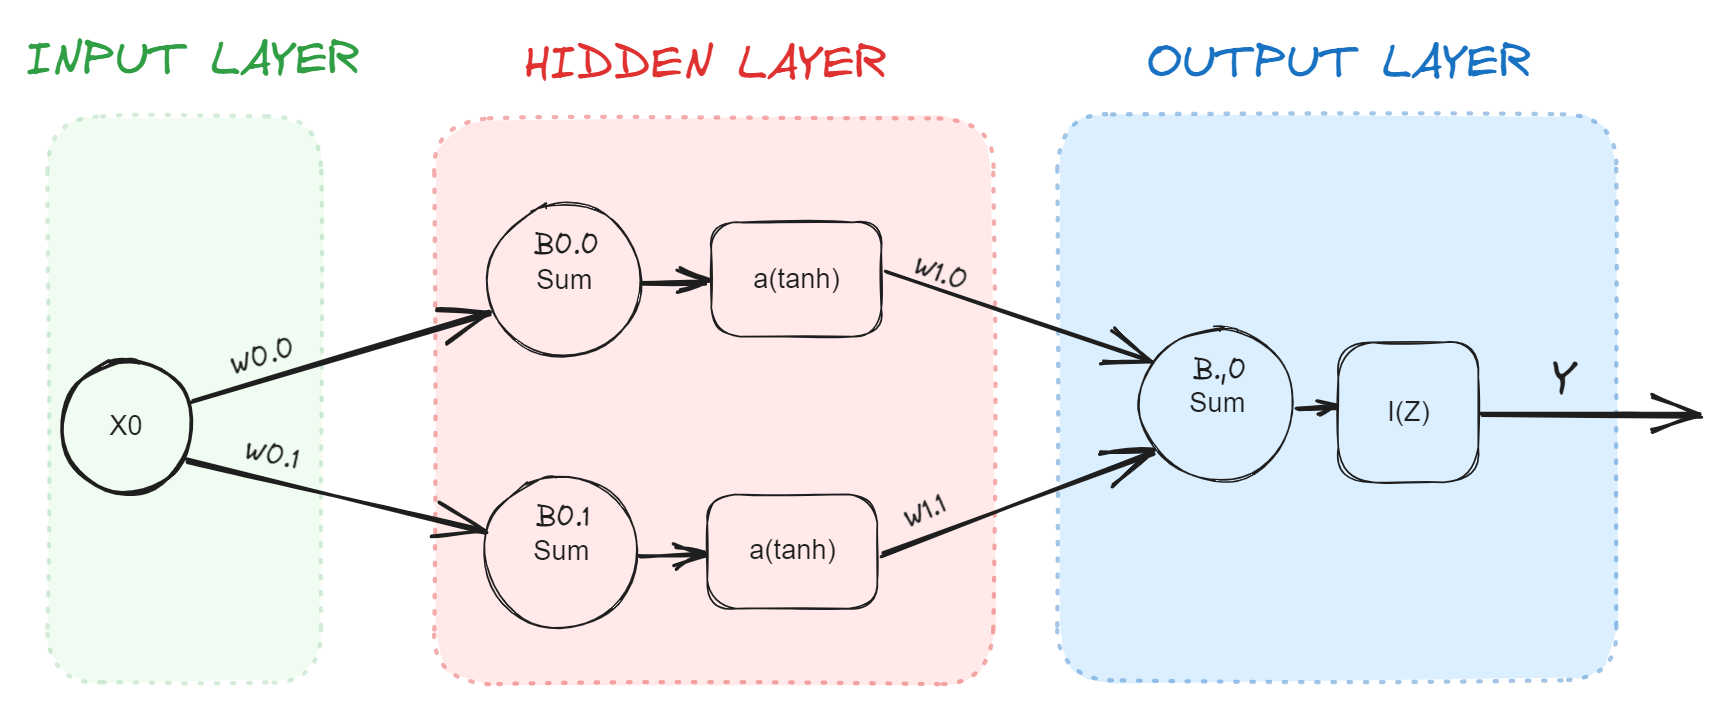

#### Qc) Mathematical formula for the network

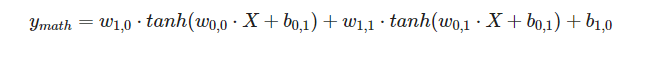

In [6]:
w0_0 = mlp.coefs_[0][0][0]
w0_1 = mlp.coefs_[0][0][1]
w1_0 = mlp.coefs_[1][0][0]
w1_1 = mlp.coefs_[1][1][0]
b0_0 = mlp.intercepts_[0][0]
b0_1 = mlp.intercepts_[0][1]
b1_0 = mlp.intercepts_[1][0]
y_math = w1_0 * np.tanh(w0_0 * X + b0_0) + w1_1 * np.tanh(w0_1 * X + b0_1) + b1_0

print("OK")

OK


__Qd) Ploting of math function__

Here is the plot of the mathematical function, the predictions made by the MLP, and the actual values. All three exhibit a striking similarity.

OK


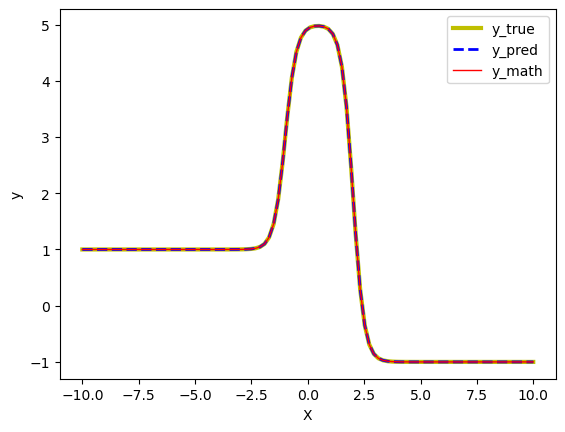

In [7]:
plt.plot(X, y_true, "y-", linewidth=3.0)
plt.plot(X, y_pred, "b--", linewidth=2.0)
plt.plot(X, y_math, "r-", linewidth=1.0)

plt.legend(["y_true", "y_pred", "y_math"])
plt.xlabel("X")
plt.ylabel("y")

print("OK")

#### Qe)

Let's examine the two components of the function separately. We'll plot each of them individually and then combine them to obtain the complete function.

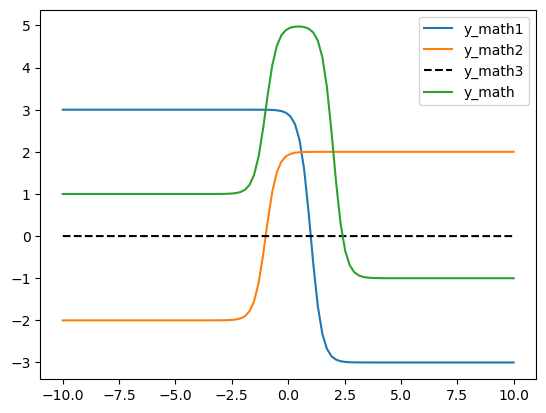

In [8]:
y_math1 = w1_0 * np.tanh(w0_0 * X + b0_1)
y_math2 = w1_1 * np.tanh(w0_1 * X + b0_1)
y_math3 = np.dot(b1_0, X)

plt.plot(X, y_math1)
plt.plot(X, y_math2)
plt.plot(X, y_math3, "k--")
plt.plot(X, y_math)

plt.legend(["y_math1", "y_math2", "y_math3", "y_math"])
plt.show()

__Similarity to a Monotonic tanh Activation Function:__

- The first part of y_math (0.3 * tanh(2 * X + 0.1)) resembles a scaled and shifted tanh activation function. 
It is monotonic and exhibits S-shaped behavior, similar to a tanh activation function.

- The second part of y_math (-0.3 * tanh(5 * X + 3)) also resembles a scaled and shifted tanh activation function but with different scaling and shifting. It is also monotonic and exhibits S-shaped behavior.


__Network's Ability to Approximate the Input Function:__

- The two-neuron network, with the appropriate weights and biases, can approximate a complex function by combining the outputs of these two "tanh-like" activation functions.

- By using different scaling and shifting parameters in the two parts and combining them with appropriate weights and biases, the network can model a more complex and non-linear function. This demonstrates the expressive power of neural networks, even with a small number of neurons.

- In this example, the network is able to approximate the input function by combining these two parts with appropriate weights and biases, showing that even a simple network architecture can approximate complex functions when trained effectively.

#### Qf) Extending the MLP with more neurons and layers
The approximation is spot on

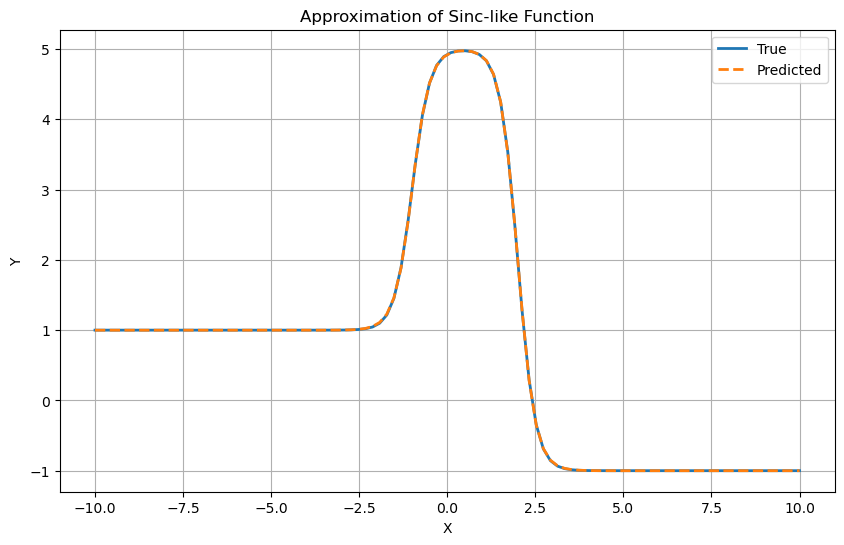

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Function to generate Sinc-like data
def GenerateSincData():
    X = np.linspace(-3, 3, 1000) 
    y = sinc_like_function(X)
    X = X.reshape(-1, 1)
    return X, y

# Creating and fitting MLP model with more neurons and layers
mlp = MLPRegressor(
    activation='tanh',
    hidden_layer_sizes=[2, 2],  # Two hidden layers with 50 neurons each
    alpha=1e-5,
    solver='lbfgs',
    max_iter=10000,
    verbose=True
)
mlp.fit(X, y_true)
y_pred = mlp.predict(X)

# Plotting the true Sinc-like function and the MLP approximation
plt.figure(figsize=(10, 6))
plt.plot(X, y_true, label='True', linewidth=2)
plt.plot(X, y_pred, label='Predicted', linestyle='--', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Approximation of Sinc-like Function')
plt.grid(True)
plt.show()


We have found that a simple ANN with just one hidden layer and two neurons can handle basic functions with one peak quite well. But when it comes to more complex stuff like the sinc function, it falls short. To tackle those trickier tasks, well need to beef up the MLPs capabilities, adjusting its structure to handle more complicated functions like sinc. It's all about using the right tool for the job.